In this assignment you will build and optimize a kNN model to predict diabetes occurence using the Pima Indian Diabetes dataset

https://www.kaggle.com/uciml/pima-indians-diabetes-database

1. Load the data
2. Assess target variable distribution
3. Explore distribution and information value of individual features using a pairplot
4. Rescale the data for analysis


5 pts.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
# Load Data

import io
diabetes_data = pd.read_csv(io.BytesIO(uploaded['diabetes.csv']))

In [ ]:
# NOTE: data will be limited to only significant features, as per week 2 Assignment

diabetes_data = diabetes_data[['Outcome', 'Pregnancies', 'Glucose', 'BloodPressure']]

In [ ]:
diabetes_data.head()

,Outcome,Pregnancies,Glucose,BloodPressure
0,1,6,148,72
1,0,1,85,66
2,1,8,183,64
3,0,1,89,66
4,1,0,137,40


In [ ]:
# Assess target variable distribution

diabetes_data['Outcome']

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

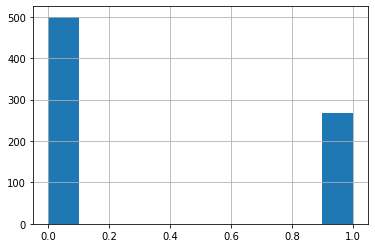

In [ ]:
# Assess target variable distribution

diabetes_data.Outcome.hist()

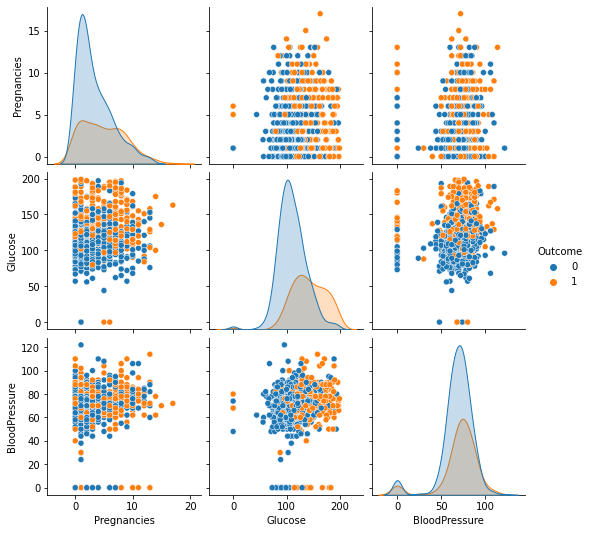

In [ ]:
# Explore distribution and information value of individual features using a pairplot

sns.pairplot(diabetes_data, hue='Outcome')

In [ ]:
diabetes_data.describe()

,Outcome,Pregnancies,Glucose,BloodPressure
count,768.000000,768.000000,768.000000,768.000000
mean,0.348958,3.845052,120.894531,69.105469
std,0.476951,3.369578,31.972618,19.355807
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,99.000000,62.000000
50%,0.000000,3.000000,117.000000,72.000000
75%,1.000000,6.000000,140.250000,80.000000
max,1.000000,17.000000,199.000000,122.000000


In [ ]:
X = diabetes_data.drop('Outcome', axis=1)
y = diabetes_data['Outcome']

In [ ]:
X.describe()

,Pregnancies,Glucose,BloodPressure
count,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469
std,3.369578,31.972618,19.355807
min,0.000000,0.000000,0.000000
25%,1.000000,99.000000,62.000000
50%,3.000000,117.000000,72.000000
75%,6.000000,140.250000,80.000000
max,17.000000,199.000000,122.000000


In [ ]:
y.mean()

0.3489583333333333

In [ ]:
# Rescaling dataset for analysis

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

X_rescaled = pd.DataFrame(X_, columns=X.columns)

In [ ]:
# Verification of all features to ensure scaling was successful

X_rescaled.describe()

,Pregnancies,Glucose,BloodPressure
count,768.000000,768.000000,768.000000
mean,0.226180,0.607510,0.566438
std,0.198210,0.160666,0.158654
min,0.000000,0.000000,0.000000
25%,0.058824,0.497487,0.508197
50%,0.176471,0.587940,0.590164
75%,0.352941,0.704774,0.655738
max,1.000000,1.000000,1.000000


5. Develop a kNN model to predict diabetes occurence using k = 5
6. Determine the optimal value of k based on the ROC AUC (Hint: scoring="roc_auc")

10 pts.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rescaled, y, test_size=0.3, random_state=1)

In [ ]:
# KNN model to predict diabetes occurences using k =5

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[134  12]
 [ 42  43]]
              precision    recall  f1-score   support

           0       0.76      0.92      0.83       146
           1       0.78      0.51      0.61        85

    accuracy                           0.77       231
   macro avg       0.77      0.71      0.72       231
weighted avg       0.77      0.77      0.75       231



In [ ]:
# ROC AUC for Neighbors = 5

from sklearn.metrics import roc_auc_score

print('ROC AUC KNN Model Neighbors=5: ', roc_auc_score(y_test,y_pred))

ROC AUC KNN Model Neighbors=5:  0.7118452860596294


In [ ]:
from sklearn.model_selection import cross_val_score
max_K = 100
cv_scores = [ ]

for K in range(1,max_K):
  knn = KNeighborsClassifier(n_neighbors = K)
  scores = cross_val_score(knn,X_train,y_train.values.ravel(),cv = 5, scoring = "roc_auc")
  cv_scores.append(scores.mean())

In [ ]:
# Optimal value of k based on the ROC AUC = 22

cv_scores[:25]

[0.6194061365188126,
 0.6798941396124495,
 0.6977305273079921,
 0.6897284004326257,
 0.7012727717657296,
 0.7061807179412813,
 0.709695862864877,
 0.7142207902067057,
 0.7186962012314124,
 0.7313332547839589,
 0.7428835777427327,
 0.7482741191896121,
 0.7571101080960235,
 0.758786714279672,
 0.7594625712231345,
 0.7594592781916725,
 0.7611808689977704,
 0.761996000024169,
 0.765122295333563,
 0.7686836937541164,
 0.7669626769626771,
 0.7699048948344723,
 0.7639057770043685,
 0.7648974326439115,
 0.7689423024634292]

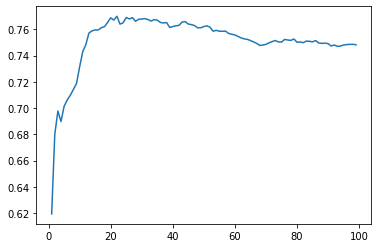

In [ ]:
# visual representation of cv scores

sns.lineplot(x=range(1,max_K), y=cv_scores)

7. Compare the optimized kNN model performance vis-a-vis logistic regression model from last week across the following metrics: Recall, Precision, F1, ROC AUC. Which is the better model based on each metric?

5 pts.

In [ ]:
# Optimal KNN model performance

knn = KNeighborsClassifier(n_neighbors=22, metric='euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[139   7]
 [ 48  37]]
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       146
           1       0.84      0.44      0.57        85

    accuracy                           0.76       231
   macro avg       0.79      0.69      0.70       231
weighted avg       0.78      0.76      0.74       231



In [ ]:
print('ROC AUC Optimal KNN Model: ', roc_auc_score(y_test,y_pred))

ROC AUC Optimal KNN Model:  0.6936744560838034


In [ ]:
# Logistic Model assessment

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(solver='liblinear')
logmodel.fit(X_train, y_train)

y_pred_log = logmodel.predict(X_test)

In [ ]:
confusion_matrix(y_test,y_pred_log)

array([[139,   7],
       [ 41,  44]])

In [ ]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

           0       0.77      0.95      0.85       146
           1       0.86      0.52      0.65        85

    accuracy                           0.79       231
   macro avg       0.82      0.73      0.75       231
weighted avg       0.81      0.79      0.78       231



In [ ]:
print('ROC AUC Log Model: ', roc_auc_score(y_test,y_pred_log))

ROC AUC Log Model:  0.7348509266720387


After determining the optimal value of K for the best possible KNN Model (22), it still does not compare with the Logistic Model as illustrated above.

The Logistic Model performed equally or better in all metrics under evaluation and is the better model when dealing with this particular dataset with these particular features. 

Final Analysis:
Log Model AUC = 0.73
Optimal KNN = 0.69

Precision performed better in both predictive negative and predictive positive outcomes in the Log Model (0.77 & 0.86, respectively) vs the optimal KNN Model (0.74 & 0.84, respectively).

Recall performed equally as successful correctly identifying True negatives and better in correctly identifying True positives in the Log Model (0.95 & 0.52, respectively) vs the optimal KNN Model (0.95 & 0.44, respectively).

As a result of higher precision and recall scores for the Log Model, the f1 scores for both negative and positive outcomes in the Log Model performed better as well: (0.85 & 0.65, respectively) vs the optimal KNN Model: (0.83 & 0.57, respectively).